#Aqui vamos ver tópicas de estatística inferencial utilizando python.

como fazer uma amostra, utilizar de distribuições normais e  calcular intervalos de confiança

##importando bibliotecas necessárias

fora as bibliotecas mais conhecidas. vamos usar o método do scipy.stats, o norm que gera uma distribuição normal.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
import scipy.stats as st

import os
import random

## Amostragem

alguns métodos de como criar amostragem no python

### criando lista de queijos e tirando amostra simples aleatória

 uma produtora de queijos deseja fazer um estudo sobre a qualidade do seu produto. para isso ela vai conduzir uma amostragem simples aleatória de 20 queijos em um lote de 100. Cada queijo recebe uma identificação numérica

Ao termino dessa célula teremos uma amostragem aleatória em cima da lista.

In [4]:
lista_queijos = list(range(1,101))
amostra_aleatoria_queijos = random.sample(lista_queijos, k=20)
amostra_aleatoria_queijos

[16, 44, 38, 23, 77, 72, 3, 45, 34, 57, 24, 37, 61, 73, 65, 74, 9, 21, 86, 98]

### criando amostragem selecionando cidades

Um grupo de pesquisa deseja estudar nível de educação em algumas cidades do Brasil. Para isso, precisam selecionar da população original, 2 itens de cada uma das cidades consideradas no estudo para incluir na amostra. 

#### Criando dataframe

In [8]:
cidades = {"cidade": ["Belo Horizonte","Porto Alegre", "Rio de Janeiro", "Belem",
                      "Porto Alegre", "Porto Alegre","Vitoria", "Maceio","Belem",
                     "Belo Horizonte", "Maceio", "Vitoria", "Belem", "Rio de Janeiro","Belo Horizonte","Porto Alegre", "Belo Horizonte",
                     "Belo Horizonte", "Belem","Porto Alegre", "Vitoria", "Rio de Janeiro",
                      "Belo Horizonte", "Belem", "Maceio", "Vitoria"]}

cidades_df = pd.DataFrame(data=cidades)
cidades_df

,cidade
0,Belo Horizonte
1,Porto Alegre
2,Rio de Janeiro
3,Belem
4,Porto Alegre
5,Porto Alegre
6,Vitoria
7,Maceio
8,Belem
9,Belo Horizonte


#### agrupando os valores e usando lambda

para agruparmos os valores da pesquisa por cidades, usamos o método groupby e escolhemos cidade como parametro.

usamos ainda a função apply, onde passamos um parametro que queremos seguir, nesse caso vamos usar uma função lambda, que o parametro passado nela é aplicado como função em todo o DF.

In [9]:
cidades_df.groupby("cidade").apply(lambda x: x.sample(2, random_state=42) )

cidade
cidade                           
Belem          8            Belem
               23           Belem
Belo Horizonte 0   Belo Horizonte
               9   Belo Horizonte
Maceio         7           Maceio
               10          Maceio
Porto Alegre   4     Porto Alegre
               19    Porto Alegre
Rio de Janeiro 2   Rio de Janeiro
               13  Rio de Janeiro
Vitoria        11         Vitoria
               25         Vitoria

essa tabela quer dizer que selecionamos esses itens pra representar cada cidade,. podemos ainda fazer a tabela sem a coluna que indica as cidades fazendo o parametro group_keys = false.

In [10]:
cidades_df.groupby("cidade", group_keys=False).apply(lambda x: x.sample(2, random_state=42))

,cidade
8,Belem
23,Belem
0,Belo Horizonte
9,Belo Horizonte
7,Maceio
10,Maceio
4,Porto Alegre
19,Porto Alegre
2,Rio de Janeiro
13,Rio de Janeiro


## Teorema do limite Central

para quem não lembra, o teorema diz que ao pegar diversas amostras, a média das amostras, se elas foram acima de n=30, geramos uma distribuição muito próxima da 

```
# Isto está formatado como código
```

 normal.

### estabelecendo população e criando amostras aleatórias

estabelecemos uma populacao de 3000 e vamos tirar 20 amostras de 40 itens,depois disso vamos fazer a média pra cada uma dessas amostras.  


o resultado é uma lista com cada uma dessas médias

In [38]:
populacao = range(3000)
medias = []

for i in range(20):
  amostra = random.sample(populacao, k=40)
  medias.append(np.mean(amostra))

organizada = sorted(medias)
print(organizada)

[1297.975, 1389.1, 1404.875, 1407.1, 1420.65, 1445.875, 1451.375, 1505.2, 1523.575, 1527.7, 1568.225, 1569.4, 1579.925, 1600.1, 1600.6, 1630.075, 1641.575, 1646.375, 1655.625, 1826.95]


### média das médias
usamos o método np.mean() da lista de médias e tiramos a média das médias.

In [29]:
print(np.mean(medias))
print(np.median(medias))

1463.80375
1437.7875


In [26]:
np.median(medias)

1437.7875

## Distribuição normal

vamos usar o seguinte conjunto de dados para os dois exemplos a seguir

In [51]:
data = [-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72727273,
         2.92929293,   3.13131313,   3.33333333,   3.53535354,
         3.73737374,   3.93939394,   4.14141414,   4.34343434,
         4.54545455,   4.74747475,   4.94949495,   5.15151515,
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ]

###Plotando normais de acordo com seu desvio padrão

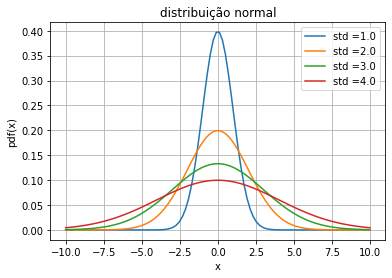

In [67]:
fig, ax = plt.subplots()

stds = [1.0,2.0,3.0,4.0]

for std in stds:
  ax.plot(data,norm.pdf(data,scale=std),label = 'std =%.1f' %std)

ax.set_ylabel('pdf(x)')
ax.set_xlabel('x')
ax.set_title('distribuição normal')
ax.legend(loc='best',frameon=True)
ax.grid(True)

###Plotando normais de acordo com sua média

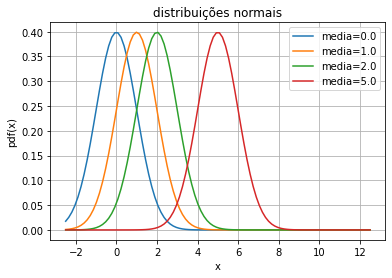

In [79]:
fig, ax = plt.subplots()

medias = [0.0, 1.0, 2.0, 5.0]

for media in medias:
  ax.plot(data, norm.pdf(data,loc=media), label="media=%.1f" %media)
  ax.set_ylabel('pdf(x)')
  ax.set_xlabel('x')
  ax.set_title('distribuições normais')
  ax.legend(loc='best')
  ax.grid(True)

###plotando normais com médias e desvio diferentes

como é possivel perceber nos exemplos anteriores, ao chamarmos o método norm.pdf() , scale representa o desvio padrão e loc representa a média. não confundir com loc e scale em outros métodos.

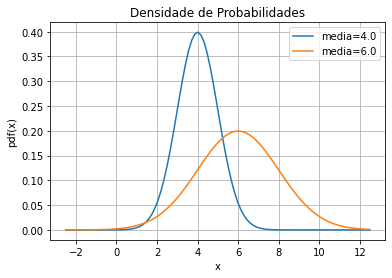

In [83]:
fig, ax = plt.subplots()

data = np.linspace(-2.5,12.5,100)

ax.plot(data, norm.pdf(data,loc=4.0, scale=1.0), label='media=%.1f' % 4.0)
ax.plot(data, norm.pdf(data,loc=6.0, scale=2.0), label='media=%.1f' % 6.0)
ax.legend(loc='best')
ax.set_ylabel('pdf(x)')
ax.set_xlabel('x')
ax.set_title('Densidade de Probabilidades')
ax.grid(True)

###Exercício


Média de altura de uma população normalmente distribuída é 1.60 m, com desvio de 0.2m. Qual a probabilidade de selecionarmos uma pessoa aleatória e essa pessoa ser mais baixa que 1.40m?

#### Resposta

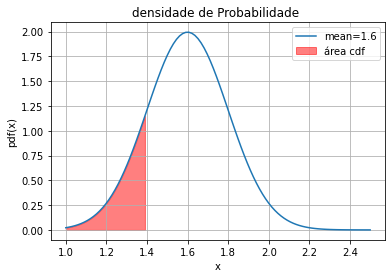

In [109]:
fig, ax = plt.subplots()

data = np.linspace(1.0, 2.5, 100)

ax.plot(data, norm.pdf(data,loc=1.6, scale=0.2), label='mean=%.1f' % 1.6)
ax.set_ylabel('pdf(x)')
ax.set_xlabel('x')    
ax.set_title('densidade de Probabilidade ')


color_region = np.arange(1.0,1.4, 0.01)
ax.fill_between(color_region, norm.pdf(color_region,loc=1.6,scale=0.2), alpha=0.5, color='red',label = "área cdf")
ax.grid(True)
ax.legend(loc='best')
plt.show()

a integral da área em vermelho gera a probabilidade que queremos, o cdf

In [100]:
norm(loc=1.6, scale=0.2).cdf(1.4)

0.15865525393145685

###Exercício

Suponha que uma variável aleatória X seja normalmente distribuída, com média 3 e desvio padrão 2. Qual a probabilidade que um ponto nessa distribuição seja maior que 2?

Formalmente queremos descobrir 𝑃(𝑋>2), dado que X ~ N (3, 2^2), ou seja a variável X segue uma distribuição normal com média 3 e variância 4 (desvio padrão 2). 

A área de interesse aparece destacada em vermelho abaixo.

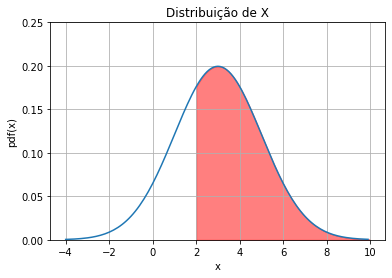

####resposta

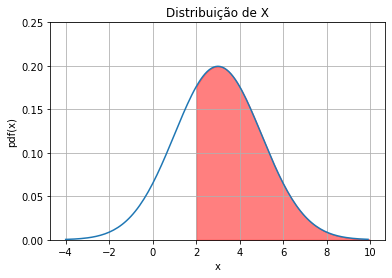

In [122]:
#código do gráfico pra referência
fig, ax = plt.subplots()

data = np.arange(-4, 10, 0.1)
ax.plot(data, norm.pdf(data, loc=3, scale=2))

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title("Distribuição de X")
ax.grid(True)

color_region = np.arange(2, 10, 0.01)
ax.set_ylim(0,0.25)
ax.fill_between(color_region, norm.pdf(color_region,loc=3,scale=2), alpha=0.5, color='red')

plt.show()

In [120]:
probabilidade_maior_2 = 1- norm.cdf(x=2, loc=3, scale=2)
print(probabilidade_maior_2)

0.6914624612740131


## Intervalo de Confiança



Caso:

Peso de uma população, vamos criar um intervalo de confiança com nível de confiança 95% para o peso populacional médio.
Usar a distribuição t (n<30)

In [111]:
sample = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

teste_peso_95 = st.t.interval(alpha=0.95, df=len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)) 

In [112]:
teste_peso_95

(16.75776979778498, 24.042230202215016)

Usando nível de confiança de 99%

In [114]:
teste_peso_99 = st.t.interval(alpha=0.99, df=len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)) 
teste_peso_99

(15.3447902793728, 25.455209720627195)

In [115]:
np.random.seed(42)
sample_data = np.random.randint(10, 30, 50)

test_norm_95 = st.norm.interval(alpha=0.95, loc=np.mean(sample_data), scale=st.sem(sample_data))

In [116]:
test_norm_95

(18.25642372955045, 21.46357627044955)

## Teste de Hipotese




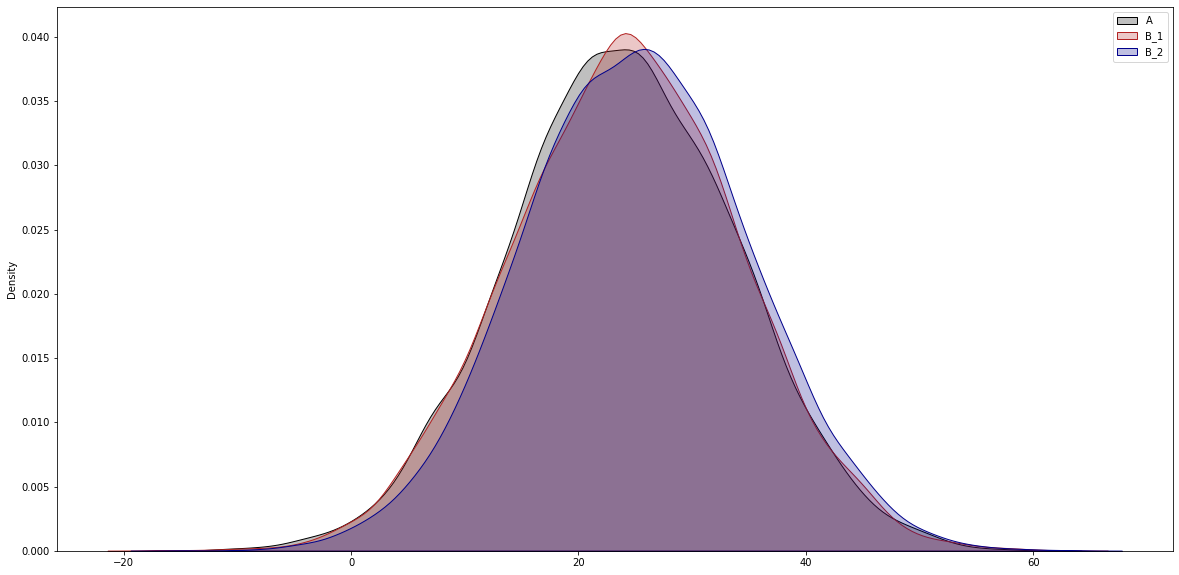

In [117]:
sample_a = np.random.normal(24, 10, 10000)
sample_b_1 = np.random.normal(24, 10, 10000)
sample_b_2 = np.random.normal(25, 10, 10000)
plt.figure(figsize=(20, 10))
sns.kdeplot(sample_a, label="A", shade = True, color = '#000000')
sns.kdeplot(sample_b_1, label="B_1", shade = True, color = '#B22222')
sns.kdeplot(sample_b_2, label="B_2", shade = True, color = '#00008B')
plt.legend()

In [118]:
import scipy.stats as stats
## H0: A = B
## H1: A != B
test_1 = stats.ttest_ind(sample_b_1,sample_a, equal_var = True)
test_2 = stats.ttest_ind(sample_b_2,sample_a, equal_var = True)
print(test_1)
print(test_2)

Ttest_indResult(statistic=1.6903665082373118, pvalue=0.09097344302770094)
Ttest_indResult(statistic=8.228607001222672, pvalue=2.0088667979678142e-16)
